# PROJETO 2 – APRENDIZADO NÃO SUPERVISIONADO

- Selecionar pelo menos dois datasets:
    - Aplicar um modelo neural não supervisionado
    - Avaliar os padrões detectados em cada conjunto:
        - Clusters / outliers, etc.
    - Avaliar a homogeneidade dos agrupamentos
    - Variar os parâmetros do modelo (grid, taxas, número de neurônios, etc.)

# Dataset

Este dataset analizado conta com 154 amostras de série temporal que representam locais queimados enquanto 154 amostras de séries temporais que representam não queimada

/tmp/ipykernel_203924/1832094113.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


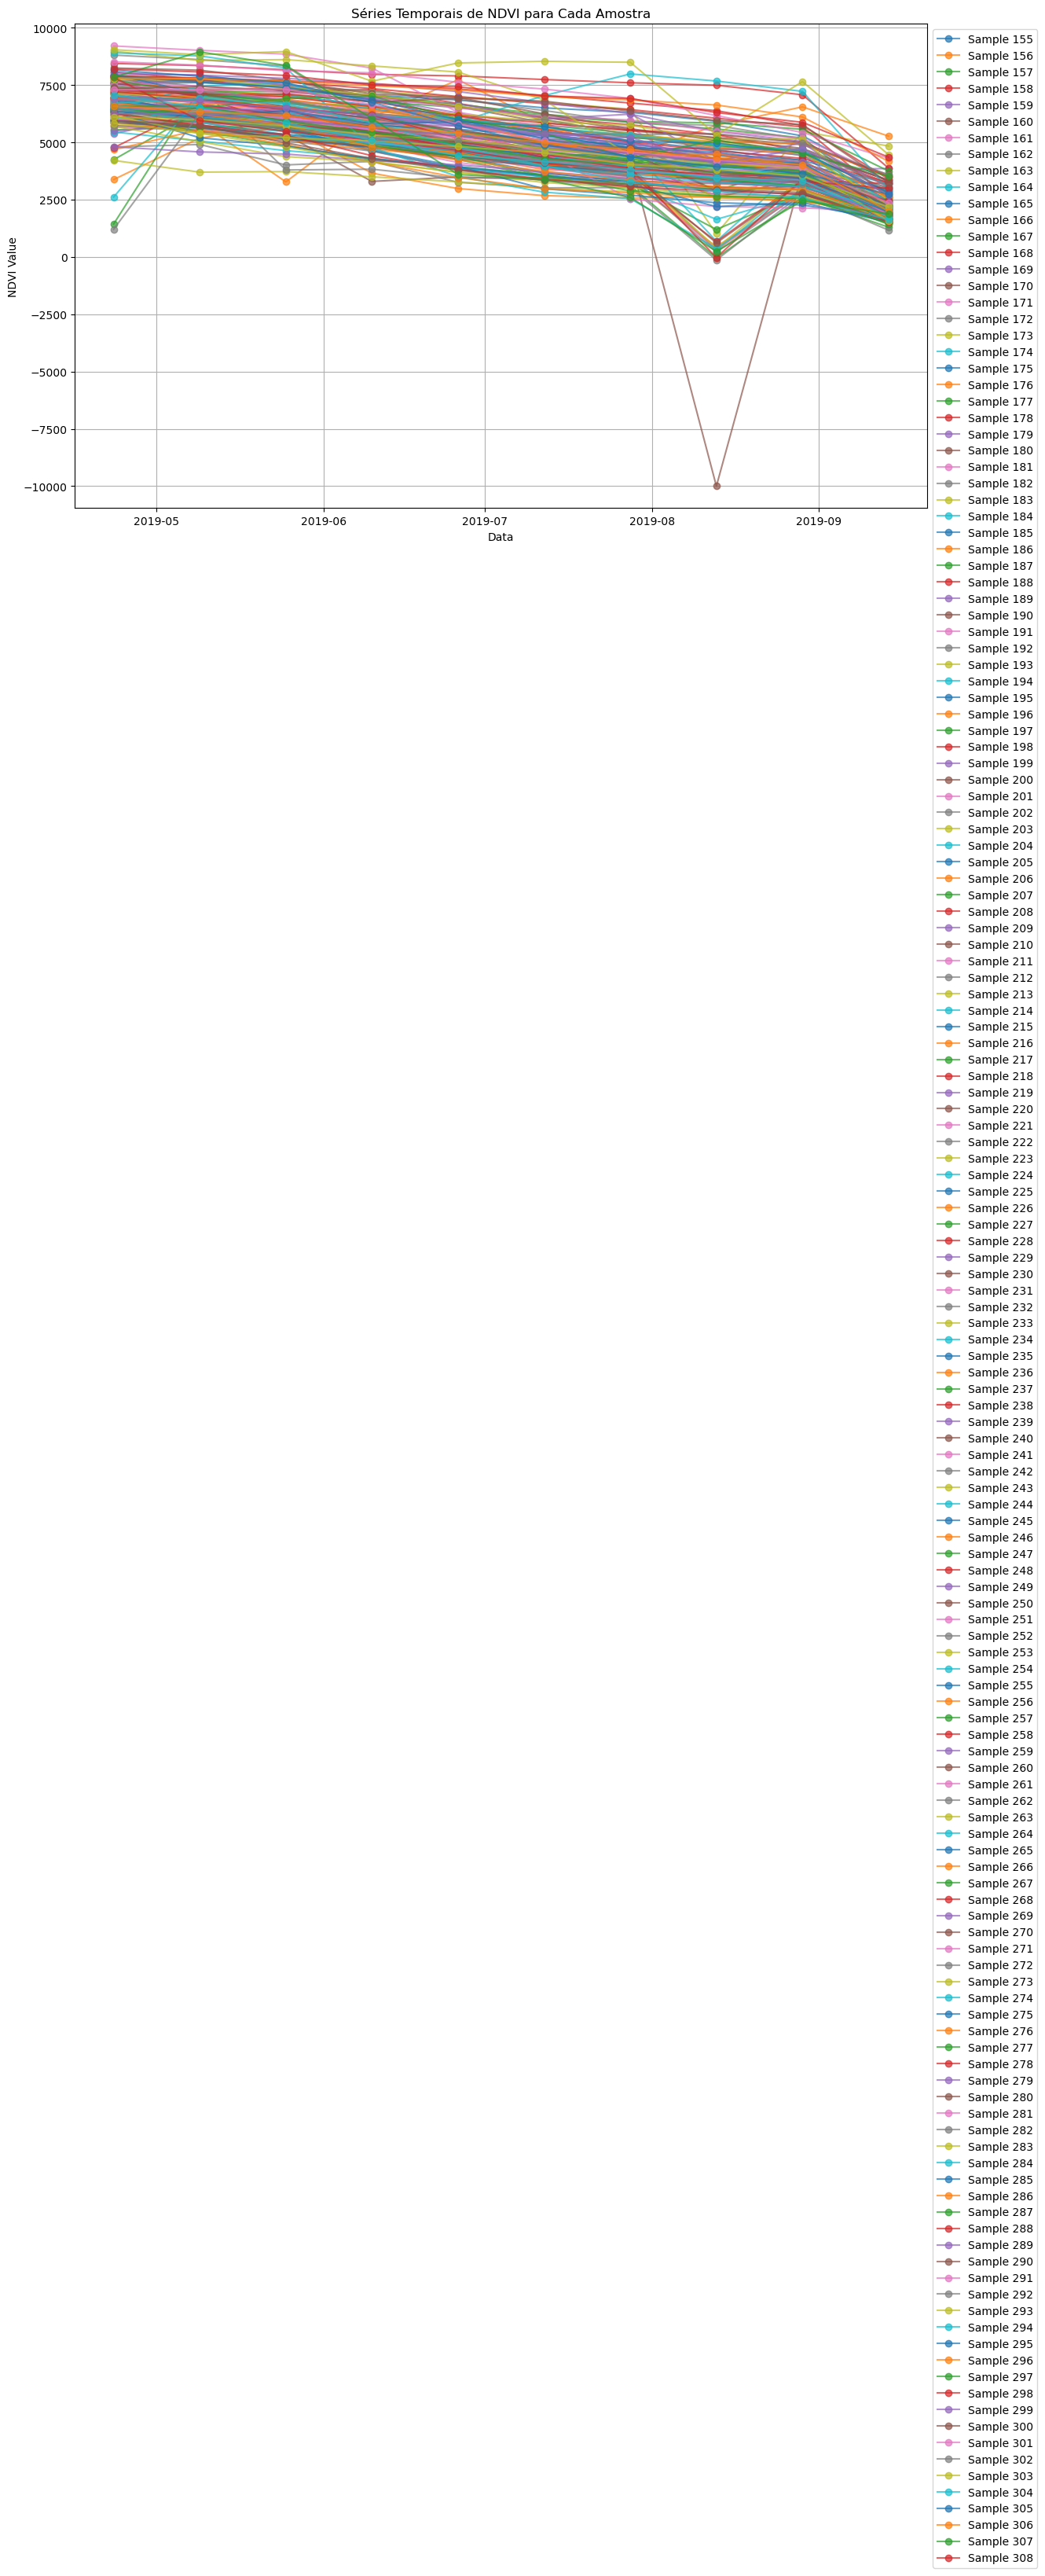

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Função para converter a data em datetime
def parse_date(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

# Carregar os dados a partir de um arquivo CSV
# Substitua 'seu_arquivo.csv' pelo caminho para o seu arquivo CSV
df = pd.read_csv('2019_17_09_transformado_resample_com_valores_e_datas.csv')

# Filtrar apenas os registros com queimada (coluna 'queimada' == 1)
queimadas = df[df['queimada'] == 1]

# Lista de colunas de valores e datas para NDVI
valores_ndvi = [f'ndvi_value_{i}' for i in range(1, 11)]
datas_ndvi = [f'ndvi_date_{i}' for i in range(1, 11)]

# Criar um gráfico
plt.figure(figsize=(14, 8))

# Iterar sobre cada amostra e plotar os valores NDVI
for index, row in queimadas.iterrows():
    dates = [pd.to_datetime(row[date_col]) for date_col in datas_ndvi]
    values = [row[value_col] for value_col in valores_ndvi]
    plt.plot(dates, values, marker='o', linestyle='-', label=f'Sample {index+1}', alpha=0.7)

# Adicionar título e legendas
plt.title('Séries Temporais de NDVI para Cada Amostra de queimada')
plt.xlabel('Data')
plt.ylabel('NDVI Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Função para converter a data em datetime
def parse_date(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

# Carregar os dados a partir de um arquivo CSV
# Substitua 'seu_arquivo.csv' pelo caminho para o seu arquivo CSV
df = pd.read_csv('2019_17_09_transformado_resample_com_valores_e_datas.csv')

# Filtrar apenas os registros com queimada (coluna 'queimada' == 1)
queimadas = df[df['queimada'] == 0]

# Lista de colunas de valores e datas para NDVI
valores_ndvi = [f'ndvi_value_{i}' for i in range(1, 11)]
datas_ndvi = [f'ndvi_date_{i}' for i in range(1, 11)]

# Criar um gráfico
plt.figure(figsize=(14, 8))

# Iterar sobre cada amostra e plotar os valores NDVI
for index, row in queimadas.iterrows():
    dates = [pd.to_datetime(row[date_col]) for date_col in datas_ndvi]
    values = [row[value_col] for value_col in valores_ndvi]
    plt.plot(dates, values, marker='o', linestyle='-', label=f'Sample {index+1}', alpha=0.7)

# Adicionar título e legendas
plt.title('Séries Temporais de NDVI para Cada Amostra de queimada')
plt.xlabel('Data')
plt.ylabel('NDVI Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


KeyError: 'queimada'

# Conclusão da série temporal 

As séries temporais de queimada são bem parecidas entre si e as de não queimada também sempre existe um gradiente negativo no fim da série temporal de queimada e isso que indica uma queimada. 

# começando o exemplo 

Esse sistema começá com a seguite classificação em séries

In [1]:
from minisom import MiniSom
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
data = pd.read_csv('2019_17_09_transformado_resample_com_valores_e_datas.csv',
                    names=['target','latitude','longitude','epsg','swir22_value_1','swir22_value_2','swir22_value_3','swir22_value_4','swir22_value_5','swir22_value_6','swir22_value_7','swir22_value_8','swir22_value_9','swir22_value_10','swir22_date_1','swir22_date_2','swir22_date_3','swir22_date_4','swir22_date_5','swir22_date_6','swir22_date_7','swir22_date_8','swir22_date_9','swir22_date_10','nir08_value_1','nir08_value_2','nir08_value_3','nir08_value_4','nir08_value_5','nir08_value_6','nir08_value_7','nir08_value_8','nir08_value_9','nir08_value_10','nir08_date_1','nir08_date_2','nir08_date_3','nir08_date_4','nir08_date_5','nir08_date_6','nir08_date_7','nir08_date_8','nir08_date_9','nir08_date_10','ndvi_value_1','ndvi_value_2','ndvi_value_3','ndvi_value_4','ndvi_value_5','ndvi_value_6','ndvi_value_7','ndvi_value_8','ndvi_value_9','ndvi_value_10','ndvi_date_1','ndvi_date_2','ndvi_date_3','ndvi_date_4','ndvi_date_5','ndvi_date_6','ndvi_date_7','ndvi_date_8','ndvi_date_9','ndvi_date_10'],sep=',')
data_1_column = int(len(data['target']))
data_without_date=np.zeros((data_1_column,int(11)))

In [52]:
data = pd.read_csv('saida_convertida_12_bits.csv',
                    names=['fid','target','7_28_2021','8_13_2021','8_29_2021','9_14_2021','9_30_2021','10_16_2021','11_1_2021','11_17_2021','12_3_2021','12_19_2021','1_1_2022','1_17_2022','2_2_2022','2_18_2022','3_6_2022','3_22_2022','4_7_2022','4_23_2022','5_9_2022','5_25_2022','6_10_2022','6_26_2022','7_12_2022','7_28_2022','8_13_2022','8_29_2022','9_14_2022','9_30_2022'],sep=',')
data_1_column = int(len(data['target']))
data_without_date=np.zeros((data_1_column,int(11)))

[[7282021 8132021 8292021 ... 8292022 9142022 9302022]
 [   3129    3005    3009 ...    2916    2736    2742]
 [   3225    3118    3100 ...    3006    2816    2811]
 ...
 [   3188    3086    3051 ...    2986    3109    3192]
 [   3221    3159    3136 ...    3075    3201    3341]
 [   3150    3091    3098 ...    2960    3122    3186]]


In [55]:
data_without_date

array([[7282021, 8132021, 8292021, ..., 8292022, 9142022, 9302022],
       [   3129,    3005,    3009, ...,    2916,    2736,    2742],
       [   3225,    3118,    3100, ...,    3006,    2816,    2811],
       ...,
       [   3188,    3086,    3051, ...,    2986,    3109,    3192],
       [   3221,    3159,    3136, ...,    3075,    3201,    3341],
       [   3150,    3091,    3098, ...,    2960,    3122,    3186]])

In [44]:

targetdata = data
valores_ndvi_cols = [
    '7_28_2021','8_13_2021','8_29_2021','9_14_2021','9_30_2021','10_16_2021','11_1_2021','11_17_2021','12_3_2021','12_19_2021','1_1_2022','1_17_2022','2_2_2022','2_18_2022','3_6_2022','3_22_2022','4_7_2022','4_23_2022','5_9_2022','5_25_2022','6_10_2022','6_26_2022','7_12_2022','7_28_2022','8_13_2022','8_29_2022','9_14_2022','9_30_2022'
]

colunas_selecionadas = ['target'] + valores_ndvi_cols
data_selecionada = data[colunas_selecionadas]
data = []
data = targetdata[colunas_selecionadas]



In [45]:
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

get_info_dataframe(data)

print(data['target'].unique())

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      671 non-null    object
 1   7_28_2021   671 non-null    object
 2   8_13_2021   671 non-null    object
 3   8_29_2021   671 non-null    object
 4   9_14_2021   671 non-null    object
 5   9_30_2021   671 non-null    object
 6   10_16_2021  671 non-null    object
 7   11_1_2021   671 non-null    object
 8   11_17_2021  671 non-null    object
 9   12_3_2021   671 non-null    object
 10  12_19_2021  671 non-null    object
 11  1_1_2022    671 non-null    object
 12  1_17_2022   671 non-null    object
 13  2_2_2022    671 non-null    object
 14  2_18_2022   671 non-null    object
 15  3_6_2022    671 non-null    object
 16  3_22_2022   671 non-null    object
 17  4_7_2022    671 non-null    object
 18  4_23_2022   671 non-null    object
 19  5_9_2022    671 non-nul

In [46]:
x = data.drop(['target'], axis=1)
target=data['target'].values

# Parametros do modelo:

In [47]:
sigma = 1
eta = 0.01
epocas = 200
random_seed = 14

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 4 # número de neurônios (dimensão 01 - linhas)
neuD2 = 4 # número de neurônios (dimensao 02 - colunas)

In [48]:
import time
start_time =time.time()
som_1 = MiniSom(neuD1, neuD2, x.shape[1],
              sigma=sigma,
              learning_rate=eta,
              neighborhood_function=neighborhood_function,
              random_seed=random_seed)

som_1.random_weights_init(x.values)
som_1.train_random(x.values, epocas)


q_error = []
t_error = []

for i in range(epocas*len(x.values)):
    rand_i = np.random.randint(len(x.values))
    som_1.update(x.values[rand_i], som_1.winner(x.values[rand_i]), i, epocas)
    q_error.append(som_1.quantization_error(x.values))
    t_error.append(som_1.topographic_error(x.values))
end_time =time.time()
print(f"Tempo de execução (inicialização e treinamento): {end_time - start_time:.2f} segundos")

plt.plot(np.arange(epocas*len(x.values)), q_error, label='Erro Quantização')
plt.plot(np.arange(epocas*len(x.values)), t_error, label='Erro Topográfico')
plt.ylabel('Erro')
plt.xlabel('Iteração')
plt.legend()
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

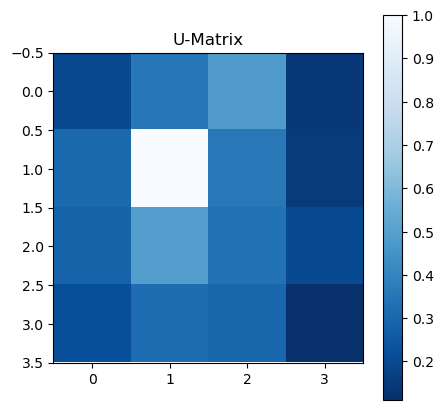

In [33]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som_1.distance_map(), cmap='Blues_r')
plt.title('U-Matrix')
plt.colorbar()
plt.show()

# Da U-matrix

Essa umatrix está mais homogênia e isso pode se dar talvez ao fato de que nosa matriz está com valores bem próximos entre si 

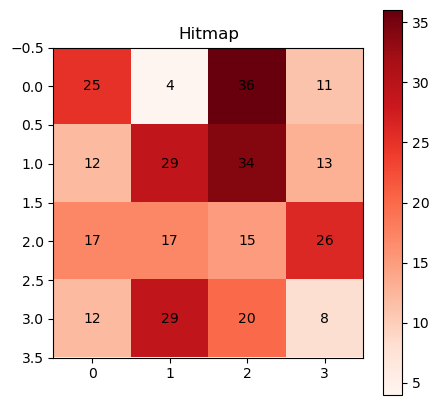

In [34]:
hits = som_1.activation_response(x.values).astype(int)
# hits = hits.T[::-1]
figure(figsize=(5, 5),dpi=100)
plt.imshow(hits,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(hits):
          plt.text(j, i, value, horizontalalignment='center', verticalalignment='center')

plt.title('Hitmap')
plt.show()

In [35]:
import pandas as pd
# Supondo que você já tenha x e target definidos, onde x é um DataFrame e target é um array ou série


In [36]:
# Aplicar PCA para reduzir a dimensionalidade dos dados para 2 dimensões
pca = PCA(n_components=10)
X_pca = pca.fit_transform(x.values)


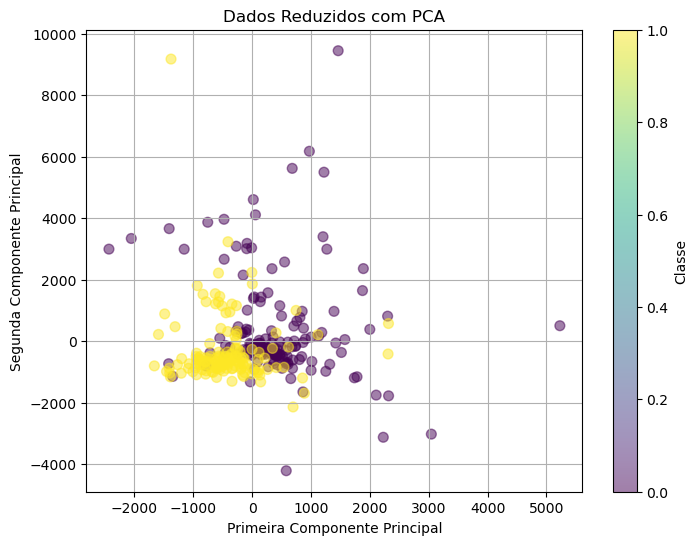

In [53]:
plt.figure(figsize=(8, 6))

# Criar um gráfico de dispersão dos dados reduzidos
scatter = plt.scatter(X_pca[:, 4], X_pca[:, 2], c=target, cmap='viridis', s=50, alpha=0.5)

# Adicionar uma barra de cor
plt.colorbar(scatter, label='Classe')

plt.title('Dados Reduzidos com PCA')
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid()
plt.show()


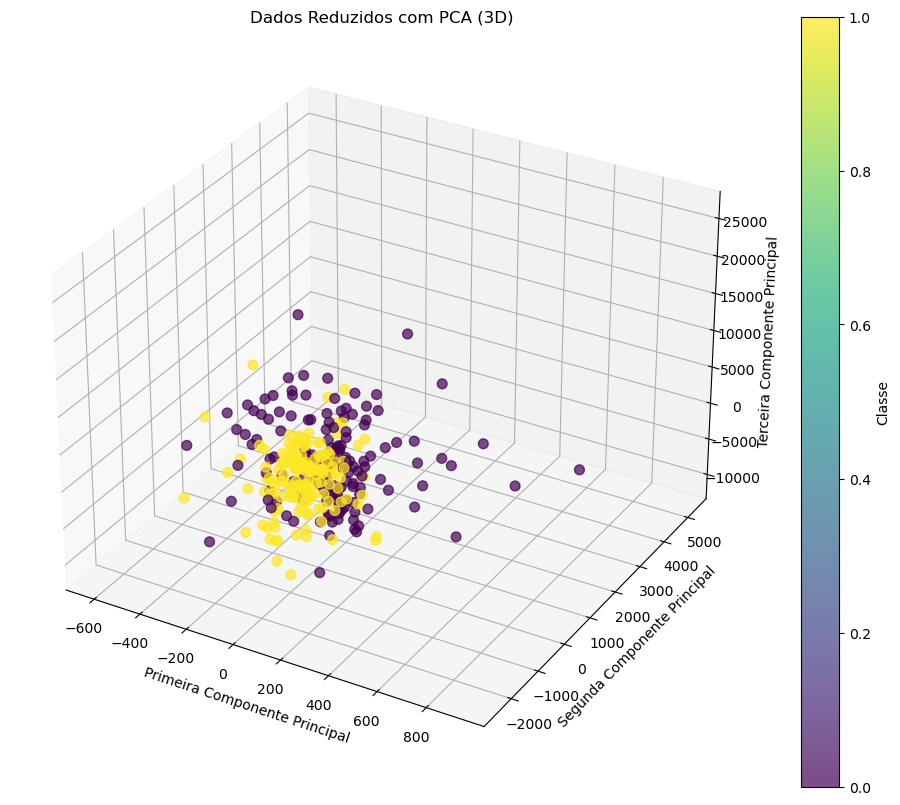

In [50]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Criar o gráfico de dispersão 3D
scatter = ax.scatter(X_pca[:,9], X_pca[:, 4], X_pca[:, 0], c=target, cmap='viridis', s=50, alpha=0.7)

# Adicionar uma barra de cor
cbar = plt.colorbar(scatter, ax=ax, label='Classe')

# Configurar títulos e rótulos
ax.set_title('Dados Reduzidos com PCA (3D)')
ax.set_xlabel('Primeira Componente Principal')
ax.set_ylabel('Segunda Componente Principal')
ax.set_zlabel('Terceira Componente Principal')

plt.show()


# Conclusão do heat map 

é muito interessante ele assumir como 11 um valor que fica clara a distinsão entre os demais pois é essa a qual representa a queimada visto que a queimada ocorreu na última amóstra da série temporal dessa forma posso testar identificar queimada passada áreas com mais de uma queimada e também áreas que estejam com alto rísco de queimada além de poder testar limaires críticos como o proposto por [esse artigo](https://seer.ufu.br/index.php/sociedadenatureza/article/view/67446) 

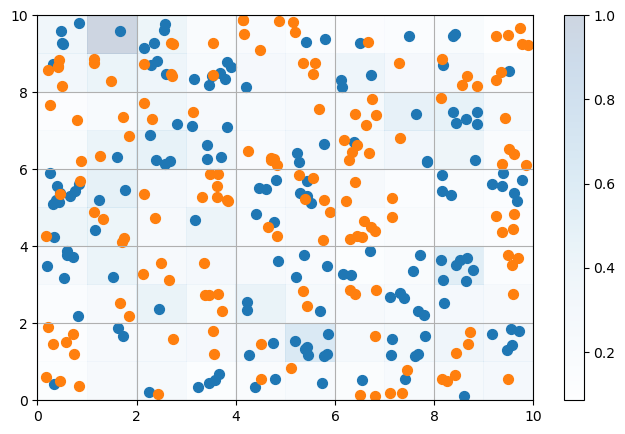

In [24]:
w_x, w_y = zip(*[som_1.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som_1.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, label=target[c])
plt.grid()
plt.show()

# como era  de se experar 

- Existe muita confuzao na ideia de um local que representa queimada ou não visto que os locais que representam 1 são os de queimadas exsitem aidna algumas amostras isoladas corretamente classificadas mas no geral visto a homogeniedade os dados acabam atrapalhando na classificação do que ajudando. Poderia testar em um estudo posterior a análise de áreas queimadas somente e ai testar se o sistema é capza de classificar em que estágio está da queimada se está para queimaar, queimada ou queimando.mas, para isso eu provavelmente precisaria ter muitos dados e esse exemplo já é bem claro e deveria dar sim o valor de interesse em estudos posteriores vou testar então mais classes e ver se o sistema é mais capaz de acertar 

# Novo teste 

Neste novo teste vou variar um pouco mais os valores para testar ver se consigo ter um pouco menos de homogenieade tambem vou dobrar a quantidade de neurônios para isso 

In [25]:
sigma = 18
eta = 0.1
epocas = 100
random_seed = 1

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 20 # número de neurônios (dimensão 01 - linhas)
neuD2 = 20 # número de neurônios (dimensao 02 - colunas)

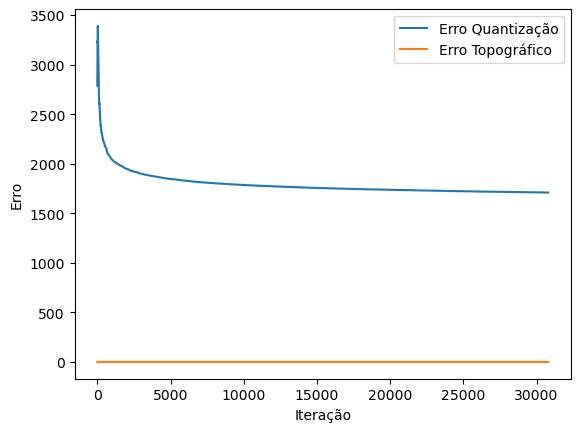

In [26]:
som_2 = MiniSom(neuD1, neuD2, x.shape[1],
              sigma=sigma,
              learning_rate=eta,
              neighborhood_function=neighborhood_function,
              random_seed=random_seed)

som_2.random_weights_init(x.values)
som_2.train_random(x.values, epocas)

q_error = []
t_error = []

for i in range(epocas*len(x.values)):
    rand_i = np.random.randint(len(x.values))
    som_2.update(x.values[rand_i], som_2.winner(x.values[rand_i]), i, epocas)
    q_error.append(som_2.quantization_error(x.values))
    t_error.append(som_2.topographic_error(x.values))

plt.plot(np.arange(epocas*len(x.values)), q_error, label='Erro Quantização')
plt.plot(np.arange(epocas*len(x.values)), t_error, label='Erro Topográfico')
plt.ylabel('Erro')
plt.xlabel('Iteração')
plt.legend()
plt.show()

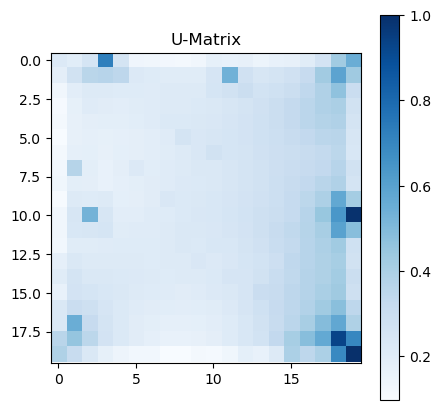

In [27]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som_2.distance_map(), cmap='Blues')
plt.title('U-Matrix')
plt.colorbar()
plt.show()

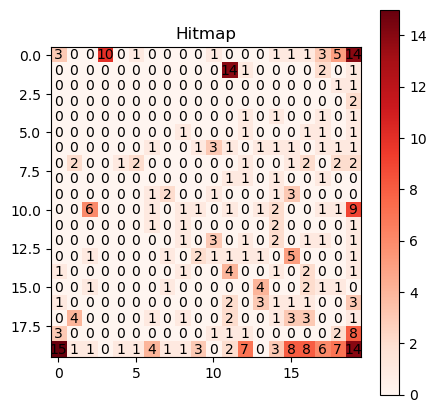

In [28]:
hits = som_2.activation_response(x.values).astype(int)
# hits = hits.T[::-1]
figure(figsize=(5, 5),dpi=100)
plt.imshow(hits,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(hits):
          plt.text(j, i, value, horizontalalignment='center', verticalalignment='center')

plt.title('Hitmap')
plt.show()

# Do heat map 

Fica claro agora que ele gerou 5 clusters bem definidos mas mesmo assim ainda podemos ser clusters ruins e na verdade gostariamos que fossem somente duas classes

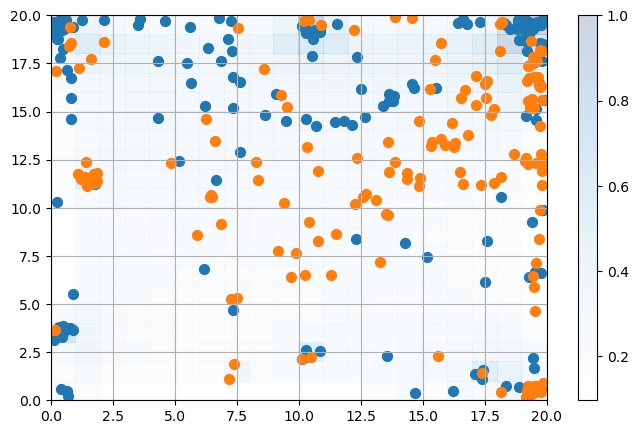

In [29]:
w_x, w_y = zip(*[som_2.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som_2.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, label=target[c])
plt.grid()
plt.show()

Embora o cluster esteja bem definido ainda assim ao plotar os valores podemos ver que há bastante confusão

# Mais um teste 

Agora vou alterar para uma grade intermediaria para testar se fazendo uma grade de 15 por 15 meu sistema é capaz de diferenciar melhor entre as duas classes e tambem alterei um pouco os valores das constantes para testar o tanto que elas empacatam aumentei tambem o nimero de épocas e mantive a função de vizinhança como gaussiana e mantive a topologia como retangular.

In [31]:
sigma = 1
eta = 0.1
epocas = 500
random_seed = 1

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 15 # número de neurônios (dimensão 01 - linhas)
neuD2 = 15 # número de neurônios (dimensao 02 - colunas)

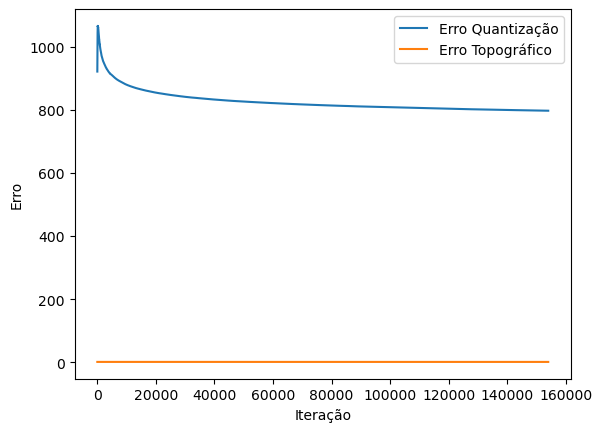

In [32]:
som_3 = MiniSom(neuD1, neuD2, x.shape[1],
              sigma=sigma,
              learning_rate=eta,
              neighborhood_function=neighborhood_function,
              random_seed=random_seed)

som_3.random_weights_init(x.values)
som_3.train_random(x.values, epocas)

q_error = []
t_error = []

for i in range(epocas*len(x.values)):
    rand_i = np.random.randint(len(x.values))
    som_3.update(x.values[rand_i], som_3.winner(x.values[rand_i]), i, epocas)
    q_error.append(som_3.quantization_error(x.values))
    t_error.append(som_3.topographic_error(x.values))

plt.plot(np.arange(epocas*len(x.values)), q_error, label='Erro Quantização')
plt.plot(np.arange(epocas*len(x.values)), t_error, label='Erro Topográfico')
plt.ylabel('Erro')
plt.xlabel('Iteração')
plt.legend()
plt.show()

Disso minha funçào demorou um pouco mais para funcionar até por que foram consideradas mais variáveis 

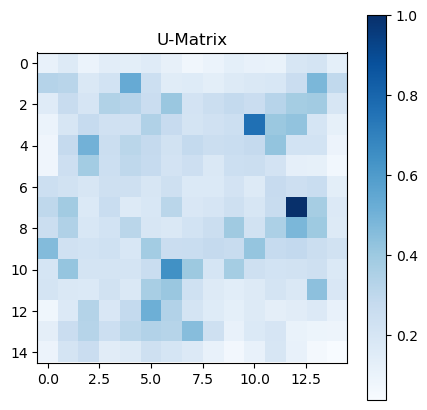

In [33]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som_3.distance_map(), cmap='Blues')
plt.title('U-Matrix')
plt.colorbar()
plt.show()

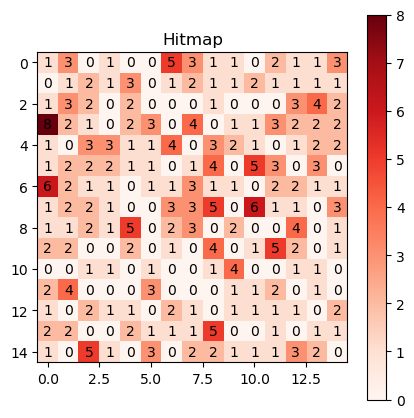

In [34]:
hits = som_3.activation_response(x.values).astype(int)
# hits = hits.T[::-1]
figure(figsize=(5, 5),dpi=100)
plt.imshow(hits,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(hits):
          plt.text(j, i, value, horizontalalignment='center', verticalalignment='center')

plt.title('Hitmap')
plt.show()

# algo interessante

Ficou mais distribuido mas não tem como eu assumir que seja por causa da melhor distribuição pois coloquei duas classes e ele não destinguiu muito bem entre as duas classes 

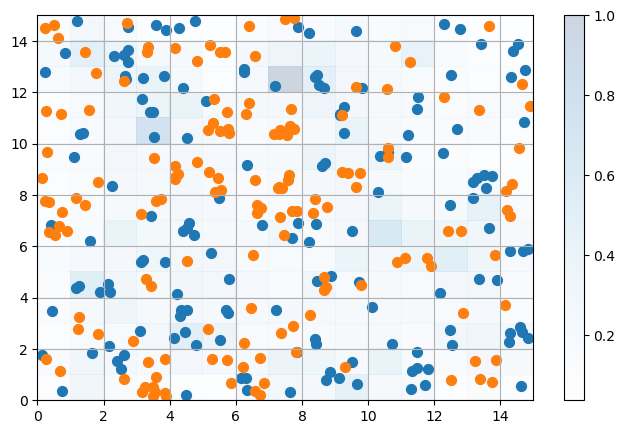

In [35]:
w_x, w_y = zip(*[som_3.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som_3.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, label=target[c])
plt.grid()
plt.show()

# Conclusão a priori 

Talvez utilizando somente uma classe de cada um dos dados como eu fiz eu consiga ter melhor resultado que usando o cluster 

não deu muito certo 

# Conclusão 

Era esperado que uma vez que visualmente parece que a série temporal é de fácil destinção que ela seria facilmente distinta com o uso de som e que seria fácil a distinção entre as duas classes mas devido até o provável ruido causado pelo variabilidade dentro da série esses dados ficam dificilmente identificados.